----------

<h1 align="center"> Marketing Campaign Lab Solutions</h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>Wei CHENG
   </font></center>
<br>

----------

## Data Description
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

### Input variables:

#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

-----

For more information visit: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Section 1 - Get Data
1. Read in the 'bank-additional' csv file as a DataFrame
    - Hint: Check the seperator
2. What are the dimensions of the DataFrame?
3. What are the data types of each column?
4. Are there any missing values?

In [2]:
url = 'https://weclouddata.s3.amazonaws.com/data/bank-additional.csv'

In [3]:
df = pd.read_csv(url, sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df.shape

(4119, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Section 2 - Data analysis

1. What is the age, job, and education of client number 21?
2. How many clients subscribed to a term deposit? How many did not?
3. What is the percentage of clients that subscribed to a term deposit vs. those that did not? 
4. How many clients have no housing loan and no personal loan?
5. What is the most popular job?
6. What is the average age of those that subscribed and those that did not?
7. What is the median number of contacts performed for those that subscribed and those that did not?
8. Can you do the previous two questions in one step?

In [9]:
# What is the age, job, and education of client number 21?

df.loc[21,['age', 'job', 'education']]

age                   39
job           technician
education    high.school
Name: 21, dtype: object

In [10]:
# How many clients subscribed to a term deposit? How many did not?

df['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [11]:
# What is the percentage of clients that subscribed to a term deposit vs. those that did not?

df['y'].value_counts(normalize=True)

y
no     0.890507
yes    0.109493
Name: proportion, dtype: float64

In [18]:
# How many clients have no housing loan and no personal loan?

df[(df['housing']=='no') & (df['loan']=='no')].shape[0]

1584

In [21]:
# What is the most popular job?

df['job'].value_counts().head(1)

job
admin.    1012
Name: count, dtype: int64

In [27]:
# What is the average age of those that subscribed and those that did not?

df.groupby('y')[['age']].mean()

,age
y,
no,39.895311
yes,41.889135


In [28]:
# What is the median number of contacts performed for those that subscribed and those that did not?

df.groupby('y')['campaign'].median()

y
no     2.0
yes    2.0
Name: campaign, dtype: float64

In [31]:
# Can you do the previous two questions in one step?

df.groupby('y').aggregate({'age': 'mean', 'campaign': 'median'})

,age,campaign
y,,
no,39.895311,2.0
yes,41.889135,2.0


## Section 3 - Data visualization

Create plots to answer the following questions:

1. What is the distribution of subscribers and non-subscribers?
2. What is the distribution of age?
3. Are there outliers in age?
4. Which day of the week is this bank most likely to contact a client?
5. What level of education do most clients have?
6. Is age correlated with duration at all?

<Axes: xlabel='y'>

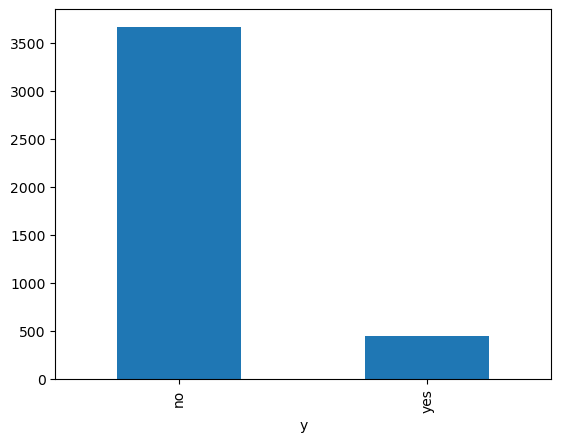

In [32]:
# What is the distribution of subscribers and non-subscribers?

df['y'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

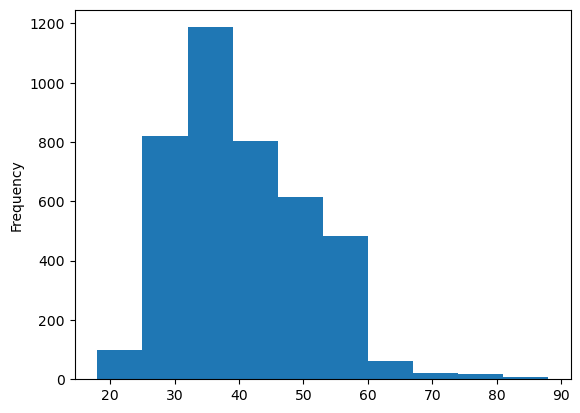

In [38]:
# What is the distribution of age?

df['age'].plot(kind='hist')

<Axes: >

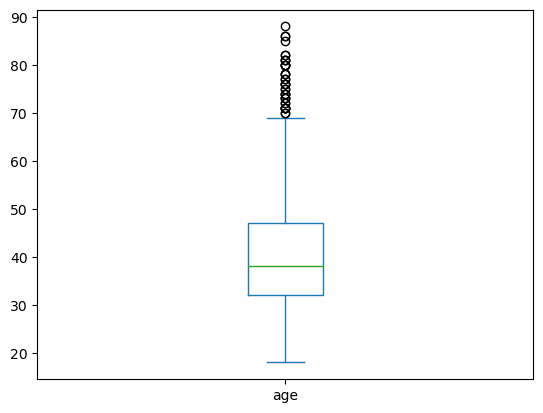

In [39]:
# Are there outliers in age?

df['age'].plot(kind='box')

<Axes: xlabel='day_of_week'>

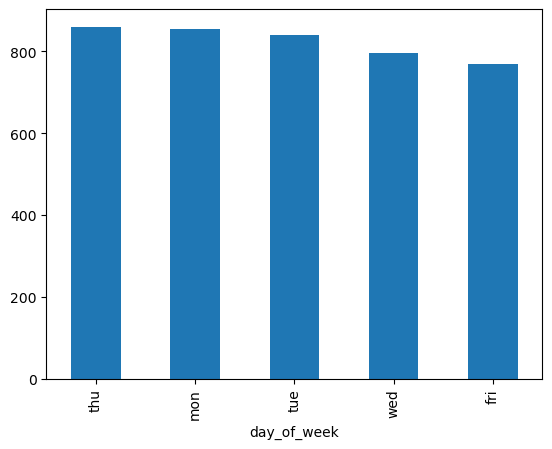

In [43]:
# Which day of the week is this bank most likely to contact a client?

df['day_of_week'].value_counts().plot(kind='bar')

<Axes: xlabel='education'>

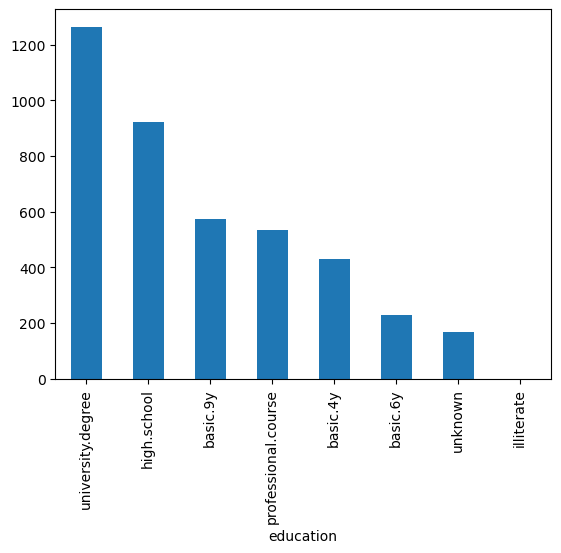

In [44]:
# What level of education do most clients have?

df['education'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='duration'>

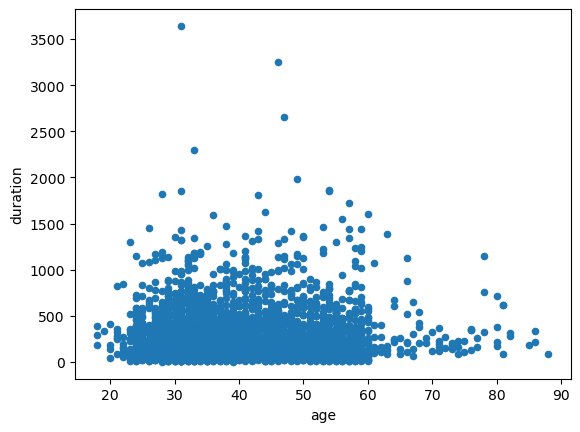

In [45]:
# Is age correlated with duration at all?

df.plot(kind='scatter', x='age', y='duration')

## Section 4 - Handling features

Based on your own domain knowledge and general understanding, try feature engineering for machine learning. Some ideas to think about:

- Which features are numerical and which ones are categorical?
- Which features should be one hot encoded?
- Which features should be label encoded instead? Why?
- Can any features be combined to make a new feature? (ex. campaign and previous)
- Can any numerical features be transformed into a categorical feature? (ex. age)
- Do features need to be scaled?
- Can any features not be used? Why not?

In [46]:
# Which features are numerical and which ones are categorical?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [47]:
# Which features should be one hot encoded?

df['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [49]:
pd.get_dummies(df['job'], dtype='int')

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,0,0,0,0,0,0,0,0,0,0,0
4115,1,0,0,0,0,0,0,0,0,0,0,0
4116,0,0,0,0,0,0,0,0,1,0,0,0
4117,1,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Which features should be label encoded instead? Why?

df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [51]:
label_encoding = {
    'unknown':0,
    'illiterate':1,
    'basic.4y':2,
    'basic.6y':3,
    'basic.9y':4,
    'high.school':5,
    'professional.course':6,
    'university.degree':7
}

In [52]:
df['education'] = df['education'].replace(label_encoding)

In [53]:
df['education']

0       4
1       5
2       5
3       4
4       7
       ..
4114    3
4115    5
4116    5
4117    5
4118    5
Name: education, Length: 4119, dtype: int64

In [54]:
# Can any features be combined to make a new feature? (ex. campaign and previous)

df['campaign+previous'] = df['campaign'] + df['previous']

In [55]:
# Can any numerical features be transformed into a categorical feature? (ex. age)

df['age_bin'] = pd.cut(df['age'], bins=[0,18,65,100], labels = ['child', 'adult', 'senior'])

In [58]:
df['age_bin'].sample(20)

676      adult
2314     adult
2495     adult
2880     adult
1253     adult
1767     adult
2620     adult
3541     adult
2024     adult
2342     adult
3933    senior
2224     adult
1613     adult
3021     adult
941      adult
373      adult
3348     adult
331      adult
4110     adult
925      adult
Name: age_bin, dtype: category
Categories (3, object): ['child' < 'adult' < 'senior']

In [ ]:
# Do features need to be scaled?

# treebased algorithems: we don't need scalling
# for regressions: we need to scale


In [59]:
# Can any features not be used? Why not?

df = df.drop(columns='duration')

In [60]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign+previous,age_bin
0,30,blue-collar,married,4,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,2,adult
1,39,services,single,5,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,4,adult
2,25,services,married,5,no,yes,no,telephone,jun,wed,...,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,1,adult
3,38,services,married,4,no,unknown,unknown,telephone,jun,fri,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,3,adult
4,47,admin.,married,7,no,yes,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,adult


## Section 5 - Machine learning

1. Select features
2. Select label
3. Use model validation to create a test set
4. Pick a ML algorithm
5. Train a model on this dataset
6. Get the classification report
7. Get the feature importances if possible

### Things to think about

- What metric should we use to evaluate our model?
- Is this a good model?
- How can we improve it? Some things to try:
    - Different algorithms
    - More hyperparameter tuning
    - Remove bad features
    - Create better features

In [62]:
# Select features

X = pd.get_dummies(df.drop(columns=['y', 'age']), dtype='int')

In [63]:
# Select label

y = df['y']

In [64]:
# Use model validation to create a test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1314)

In [65]:
# Pick a ML algorithm

model = DecisionTreeClassifier(random_state=1314)

# Train a model on this dataset

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [66]:
# Get the classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.90      0.91      1089
         yes       0.32      0.33      0.33       147

    accuracy                           0.84      1236
   macro avg       0.61      0.62      0.62      1236
weighted avg       0.84      0.84      0.84      1236



In [ ]:
# Get the feature importances if possible

# precision: out of all positive predictions, how many of them are correct
# recall: out of all positive samples, how many of them predicted correct
# f1_score: combination of prediction and recall

<Axes: >

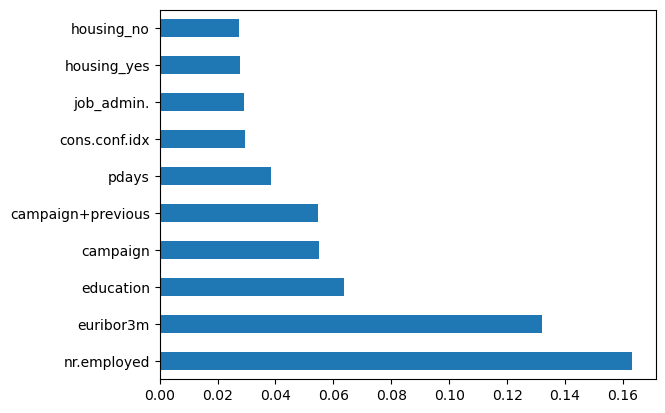

In [72]:
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False).head(10).plot(kind='barh')

In [73]:
# How can we improve it?

y_train.value_counts()

y
no     2579
yes     304
Name: count, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE(random_state = 1314)


In [76]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [77]:
y_train_resampled.value_counts()

y
no     2579
yes    2579
Name: count, dtype: int64

In [78]:
model.fit(X_train_resampled, y_train_resampled)

y_pred_2 = model.predict(X_test)

In [79]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

          no       0.91      0.89      0.90      1089
         yes       0.30      0.37      0.33       147

    accuracy                           0.82      1236
   macro avg       0.61      0.63      0.62      1236
weighted avg       0.84      0.82      0.83      1236

